In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv')
df.rename(columns={
    'Air temperature [K]': 'Air_temperature_K',
    'Process temperature [K]': 'Process_temperature_K',
    'Rotational speed [rpm]': 'Rotational_speed_rpm',
    'Torque [Nm]': 'Torque_Nm',
    'Tool wear [min]': 'Tool_wear_min'
}, inplace=True)

# Verify column names
print(df.columns)

# Plot histograms for numerical features
num_features = ['Air_temperature_K', 'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min']
df[num_features].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv'

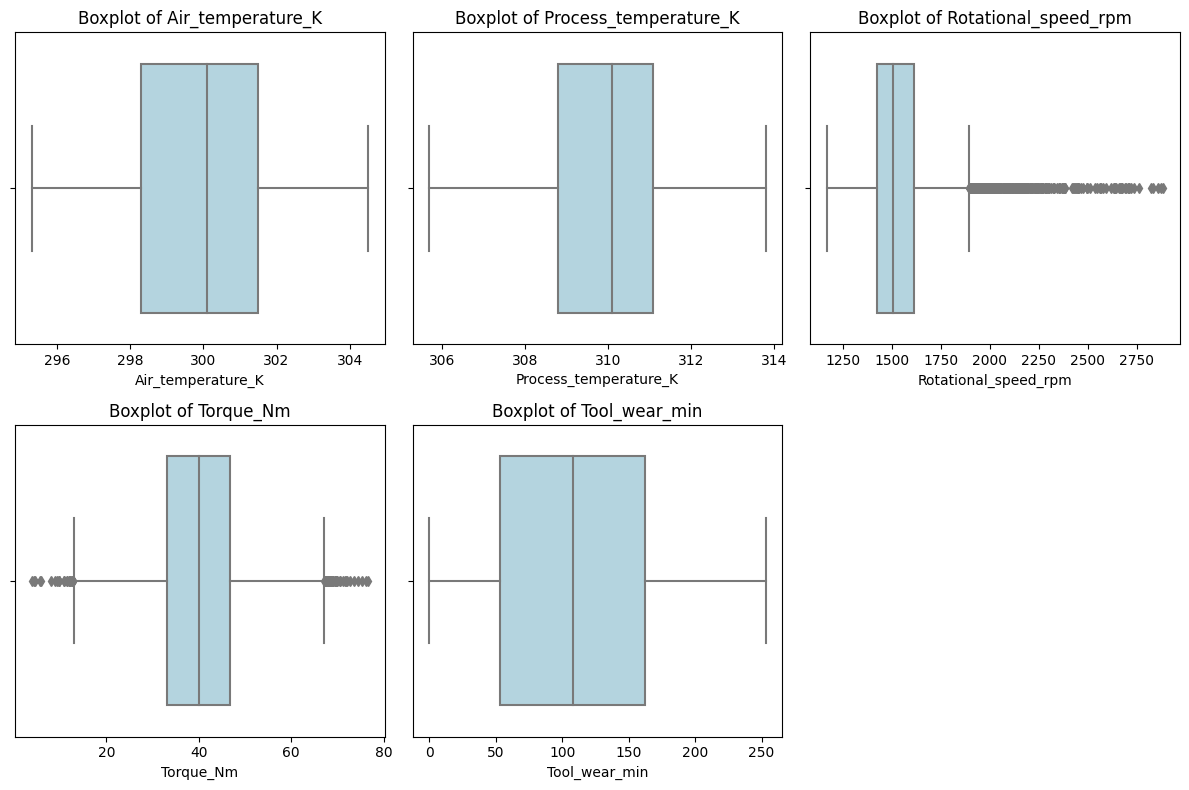

In [ ]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=feature, color='lightblue')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


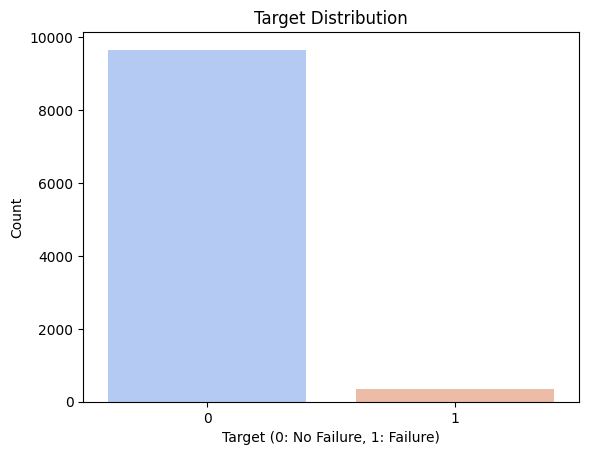

In [ ]:
sns.countplot(data=df, x='Target', palette='coolwarm')
plt.title('Target Distribution')
plt.xlabel('Target (0: No Failure, 1: Failure)')
plt.ylabel('Count')
plt.show()


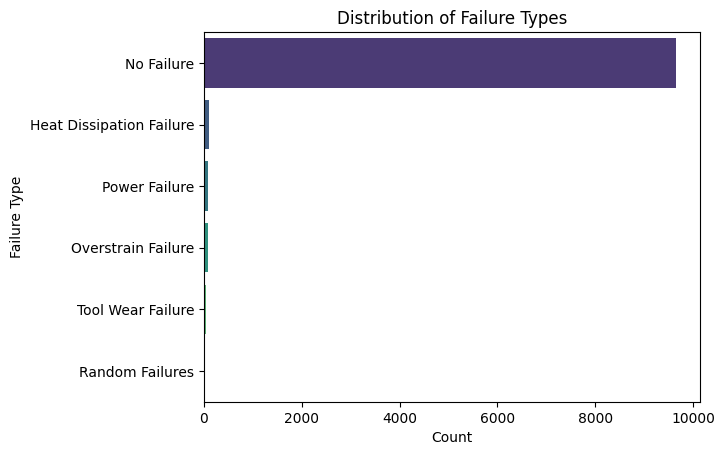

In [ ]:
# Rename the column correctly
df.rename(columns={'Failure Type': 'Failure_Type'}, inplace=True)

# Plot a countplot for 'Failure_Type'
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, y='Failure_Type', palette='viridis', order=df['Failure_Type'].value_counts().index)
plt.title('Distribution of Failure Types')
plt.xlabel('Count')
plt.ylabel('Failure Type')
plt.show()


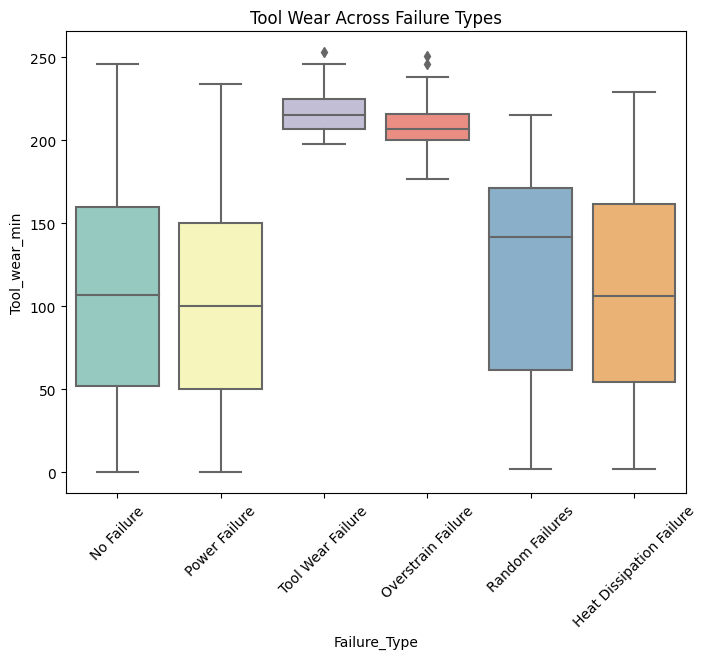

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Failure_Type', y='Tool_wear_min', palette='Set3')
plt.title('Tool Wear Across Failure Types')
plt.xticks(rotation=45)
plt.show()


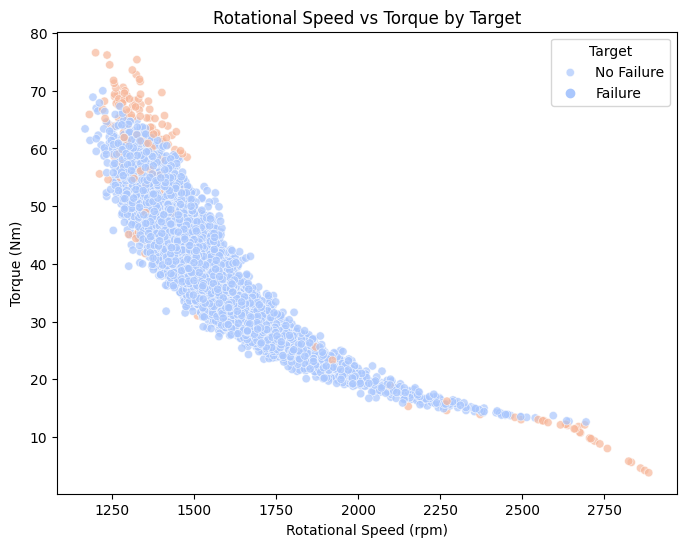

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Rotational_speed_rpm', y='Torque_Nm', hue='Target', palette='coolwarm', alpha=0.7)
plt.title('Rotational Speed vs Torque by Target')
plt.xlabel('Rotational Speed (rpm)')
plt.ylabel('Torque (Nm)')
plt.legend(title='Target', labels=['No Failure', 'Failure'])
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


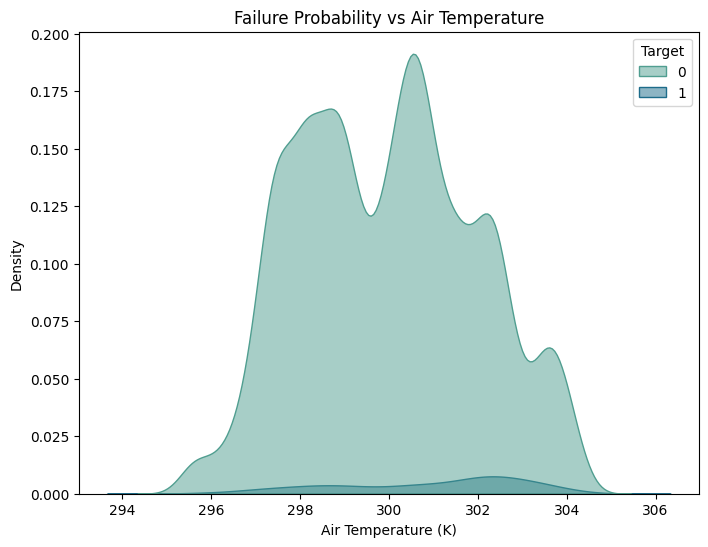

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Air_temperature_K', hue='Target', fill=True, palette='crest', alpha=0.5)
plt.title('Failure Probability vs Air Temperature')
plt.xlabel('Air Temperature (K)')
plt.ylabel('Density')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd

In [ ]:
#importing dataset and printing top 5 rows to get an idea of what dataset looks like

# df = pd.read_csv("/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv")
df = pd.read_csv("predictive_maintenance.csv")

df.head()


,UDI,Product ID,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Target,Failure_Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
print('The different failure types are:')
df['Failure Type'].unique()
#df['Target'].unique()

The different failure types are:


array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [ ]:
#renaming column 'Failure Type', because I can't call a variable with a space in it
df = df.rename(columns={'Failure Type': 'Failure_Type'})

In [ ]:
#encoder for columns with categorical data

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(df['Type'])
df['Type'] = label_encoder.transform(df['Type'])

import pickle
with open (f'label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

label_encoder.fit(df['Target'])
df['Target'] = label_encoder.transform(df['Target'])



In [ ]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure_Type
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,2,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,0,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,2,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,0,299.0,308.7,1408,48.5,25,0,No Failure


In [ ]:
print("Class Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


array([0, 1])

In [ ]:
df['Target'].unique()

array([0, 1])

In [ ]:
import pickle
with open (f'label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

In [ ]:
#splitting the data into testing set and prediction set

from sklearn.model_selection import train_test_split
X = df.drop(['Failure_Type','Product ID','Target'],axis=1)
y =  df['Target']

# Clean the column names
X.columns = X.columns.str.replace(r'[<>[\]]', '', regex=True)
X.columns = X.columns.str.replace(r'\s+', '_', regex=True)

#Make the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Check the cleaned feature names
print(X.columns)

Index(['UDI', 'Type', 'Air_temperature_K', 'Process_temperature_K',
       'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min'],
      dtype='object')


In [ ]:
#importing different ML algorithms to test

from sklearn.metrics import accuracy_score,classification_report
classifier=[]
imported_as=[]

#XGB
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier()
classifier.append('XG Boost')
imported_as.append('xgb')

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
classifier.append('Logistic Regression')
imported_as.append('lr')

#RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
classifier.append('Random Forest')
imported_as.append('rfc')

#SVM
from sklearn.svm import SVC
svc = SVC()
classifier.append('Support Vector Machine')
imported_as.append('svc')

classifiers = pd.DataFrame({'Classifier':classifier,'Imported as':imported_as})
print('All Models Imported\nModels stored in dataframe called classifiers')

All Models Imported
Models stored in dataframe called classifiers


In [ ]:
display(classifiers)

,Classifier,Imported as
0,XG Boost,xgb
1,Logistic Regression,lr
2,Random Forest,rfc
3,Support Vector Machine,svc


In [ ]:
models_to_test = [xgb, lr, rfc, svc]

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 7389 to 2732
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UDI                    8000 non-null   int64  
 1   Type                   8000 non-null   int64  
 2   Air_temperature_K      8000 non-null   float64
 3   Process_temperature_K  8000 non-null   float64
 4   Rotational_speed_rpm   8000 non-null   int64  
 5   Torque_Nm              8000 non-null   float64
 6   Tool_wear_min          8000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 500.0 KB


In [ ]:
for model in models_to_test:
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}, Accuracy: {accuracy:.4f}")

Model: XGBClassifier, Accuracy: 0.9805
Model: LogisticRegression, Accuracy: 0.9650


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: RandomForestClassifier, Accuracy: 0.9815
Model: SVC, Accuracy: 0.9625


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)

# Evaluate the xgb
accuracy = accuracy_score(y_test, y_pred)
print(f"xgb: {xgb.__class__.__name__}, Accuracy: {accuracy:.4f}")

xgb: XGBClassifier, Accuracy: 0.9805


In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
import pickle
with open (f'manufacturing_model.pkl', 'wb') as file:
    pickle.dump(xgb, file)

In [ ]:
# Check the column names in the dataframe
print(df.columns)


Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure_Type'],
      dtype='object')


In [ ]:
# Rename the column properly
df.rename(columns={'Tool wear [min]': 'Tool_wear_min'}, inplace=True)

# Verify the column names again
print(df.columns)
# Assume a failure threshold for Tool wear (e.g., max tool wear before failure)
failure_threshold = 50  # example threshold in minutes

# Calculate RUL as the difference between the failure threshold and current wear
df['RUL_estimate'] = failure_threshold - df['Tool_wear_min']
df['RUL_estimate'] = df['RUL_estimate'].clip(lower=0)  # Ensure RUL doesn't go negative

# Verify the RUL_estimate
print(df[['Product ID', 'Tool_wear_min', 'RUL_estimate']].head())


Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool_wear_min', 'Target', 'Failure_Type'],
      dtype='object')
  Product ID  Tool_wear_min  RUL_estimate
0     M14860              0            50
1     L47181              3            47
2     L47182              5            45
3     L47183              7            43
4     L47184              9            41


In [ ]:
# Prepare the dataset for regression
X = df.drop(['Failure_Type', 'Product ID', 'Target', 'RUL_estimate'], axis=1)
y = df['RUL_estimate']

# Clean the column names
X.columns = X.columns.str.replace(r'[<>[\]]', '', regex=True)
X.columns = X.columns.str.replace(r'\s+', '_', regex=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Verify the shape of the dataset
print(X_train.shape, y_train.shape)


(8000, 7) (8000,)


In [ ]:
# Import necessary libraries for regression
from sklearn.metrics import mean_squared_error, r2_score

# Regression models
regressors = []

# XGBRegressor
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor()
regressors.append(('XG Boost', xgb_regressor))

# Linear Regression
from sklearn.linear_model import LinearRegression
lr_regressor = LinearRegression()
regressors.append(('Linear Regression', lr_regressor))

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfc_regressor = RandomForestRegressor()
regressors.append(('Random Forest', rfc_regressor))

# Support Vector Regressor
from sklearn.svm import SVR
svr_regressor = SVR()
regressors.append(('Support Vector Machine', svr_regressor))

# Fit and evaluate each model
for name, model in regressors:
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    print("-" * 30)


Model: XG Boost
Mean Squared Error: 0.0000
R^2 Score: 1.0000
------------------------------
Model: Linear Regression
Mean Squared Error: 84.9061
R^2 Score: 0.4341
------------------------------
Model: Random Forest
Mean Squared Error: 0.0000
R^2 Score: 1.0000
------------------------------
Model: Support Vector Machine
Mean Squared Error: 176.2352
R^2 Score: -0.1746
------------------------------
